## Download requirements

In [ ]:
!rm -rf /content/question-answering-engine

In [1]:
!git clone https://github.com/Maro1F431/question-answering-engine.git

Cloning into 'question-answering-engine'...
remote: Enumerating objects: 465, done.
remote: Counting objects: 100% (465/465), done.
remote: Compressing objects: 100% (333/333), done.
remote: Total 465 (delta 247), reused 325 (delta 119), pack-reused 0
Receiving objects: 100% (465/465), 63.00 KiB | 6.30 MiB/s, done.
Resolving deltas: 100% (247/247), done.


In [2]:
!pip install -r question-answering-engine/requirements.txt

     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 290 kB 31.8 MB/s 
     |████████████████████████████████| 1.5 MB 60.2 MB/s 
     |████████████████████████████████| 11.3 MB 47.8 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 3.1 MB 53.2 MB/s 
     |████████████████████████████████| 646 kB 52.0 MB/s 
     |████████████████████████████████| 1.3 MB 56.5 MB/s 
     |████████████████████████████████| 8.4 MB 27.8 MB/s 
     |████████████████████████████████| 379 kB 61.9 MB/s 
     |████████████████████████████████| 4.9 MB 67.4 MB/s 
     |████████████████████████████████| 59 kB 8.5 MB/s 
     |████████████████████████████████| 1.1 MB 59.8 MB/s 
     |████████████████████████████████| 132 kB 75.6 MB/s 
     |████████████████████████████████| 243 kB 69.2 MB/s 
     |████████████████████████████████| 749 kB 60.8 MB/s 
     |████████████████████████████████| 3.3 MB 51.4 MB/s 
     |█████████████

## DEMO 10k samples

Note: If you ask "where is spain ?" the system should answer "France". This is because with 10k samples, there is not enough documents about Spain.

In [ ]:
!python /content/question-answering-engine/question_answering.py --nb-dbpedia 10000

## Demo 50K samples

Note: Now if you ask "where is spain ?" the model should answer correctly.

In [ ]:
!python /content/question-answering-engine/question_answering.py --nb-dbpedia 50000

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)
Please enter a question: Where is Spain ?
Embedding queries:
Batches: 100% 1/1 [00:00<00:00, 99.41it/s]

 Guessed answer is: southwestern Europe 

Please enter a question: Traceback (most recent call last):
  File "/content/question-answering-engine/question_answering.py", line 37, in <module>
    query = input("Please enter a question: ")
KeyboardInterrupt
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/_monitor.py", line 44, in exit
    self.join()
  File "/usr/lib/python3.7/threading.py", line 1044, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.7/threading.py", line 1060, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
Ke

## Benchmarking

In [1]:
import sys
sys.path.append('/content/question-answering-engine/modules')

In [2]:
import tqdm.notebook as tqdm

In [3]:
from indexing.build_corpus import build_corpus
from indexing.indexing import corpus_embedding, get_annoy_index, batch_indexing, annoy_indexing
from indexing.compute_mrr import compute_mrr_squad_annoy, compute_mrr_squad
from question_answering.best_answer import pick_best_answer
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
import torch

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### QA model

In [ ]:
from benchmarking.compare_qa_models import eval_model

In [ ]:
badly_classified = eval_model('mvonwyl/distilbert-base-uncased-finetuned-squad2')

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


  0%|          | 0/2 [00:00<?, ?it/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d/cache-65ce2dd3fa651587.arrow
The following columns in the test set  don't have a corresponding argument in `DistilBertForQuestionAnswering.forward` and have been ignored: example_id, offset_mapping.
***** Running Prediction *****
  Num examples = 12134
  Batch size = 8


Post-processing 11873 example predictions split into 12134 features.


  0%|          | 0/11873 [00:00<?, ?it/s]

{'exact': 64.86987282068559, 'f1': 68.4084010912902, 'total': 11873, 'HasAns_exact': 66.41363022941971, 'HasAns_f1': 73.5008343719444, 'HasAns_total': 5928, 'NoAns_exact': 63.33052985702271, 'NoAns_f1': 63.33052985702271, 'NoAns_total': 5945, 'best_exact': 64.86987282068559, 'best_exact_thresh': 0.0, 'best_f1': 68.40840109129043, 'best_f1_thresh': 0.0}


In [ ]:
badly_classified[0]

('In the course of the 10th century, the initially destructive incursions of Norse war bands into the rivers of France evolved into more permanent encampments that included local women and personal property. The Duchy of Normandy, which began in 911 as a fiefdom, was established by the treaty of Saint-Clair-sur-Epte between King Charles III of West Francia and the famed Viking ruler Rollo, and was situated in the former Frankish kingdom of Neustria. The treaty offered Rollo and his men the French lands between the river Epte and the Atlantic coast in exchange for their protection against further Viking incursions. The area corresponded to the northern part of present-day Upper Normandy down to the river Seine, but the Duchy would eventually extend west beyond the Seine. The territory was roughly equivalent to the old province of Rouen, and reproduced the Roman administrative structure of Gallia Lugdunensis II (part of the former Gallia Lugdunensis).',
 'Who did Rollo sign the treaty of

In [ ]:
badly_classified = eval_model('/content/drive/MyDrive/test-squad-trained', local=True)

Didn't find file /content/drive/MyDrive/test-squad-trained/added_tokens.json. We won't load it.
loading file /content/drive/MyDrive/test-squad-trained/vocab.txt
loading file /content/drive/MyDrive/test-squad-trained/tokenizer.json
loading file None
loading file /content/drive/MyDrive/test-squad-trained/special_tokens_map.json
loading file /content/drive/MyDrive/test-squad-trained/tokenizer_config.json
loading configuration file /content/drive/MyDrive/test-squad-trained/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForQuestionAnswering"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dt

  0%|          | 0/2 [00:00<?, ?it/s]

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


  0%|          | 0/12 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `DistilBertForQuestionAnswering.forward` and have been ignored: offset_mapping, example_id.
***** Running Prediction *****
  Num examples = 12134
  Batch size = 8


Post-processing 11873 example predictions split into 12134 features.


  0%|          | 0/11873 [00:00<?, ?it/s]

{'exact': 45.60768129369157, 'f1': 48.726043263927465, 'total': 11873, 'HasAns_exact': 41.39676113360324, 'HasAns_f1': 47.642427745042234, 'HasAns_total': 5928, 'NoAns_exact': 49.806560134566865, 'NoAns_f1': 49.806560134566865, 'NoAns_total': 5945, 'best_exact': 50.36637749515708, 'best_exact_thresh': 0.0, 'best_f1': 51.18661078307069, 'best_f1_thresh': 0.0}


In [ ]:
badly_classified[0]

### Indexing models

In [6]:
# 9k samples
corpus, squad_valid, map_question_context = build_corpus(9000)
indexing_model_name = 'sentence-transformers/msmarco-distilbert-dot-v5'
indexing_model = SentenceTransformer(indexing_model_name)
embedded_corpus = corpus_embedding(corpus, indexing_model, indexing_model_name)

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/320 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

In [13]:
mrr = compute_mrr_squad(embedded_corpus, map_question_context, indexing_model, squad_valid, comparison_metric='dot')

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

In [14]:
print(mrr)

0.6540484578663393


In [15]:
mrr_annoy = compute_mrr_squad_annoy(embedded_corpus, map_question_context, indexing_model, indexing_model_name, 10, squad_valid)

Create Annoy index with 256 trees.
Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

In [16]:
print(mrr_annoy)

0.21912068064262114


Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/554 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

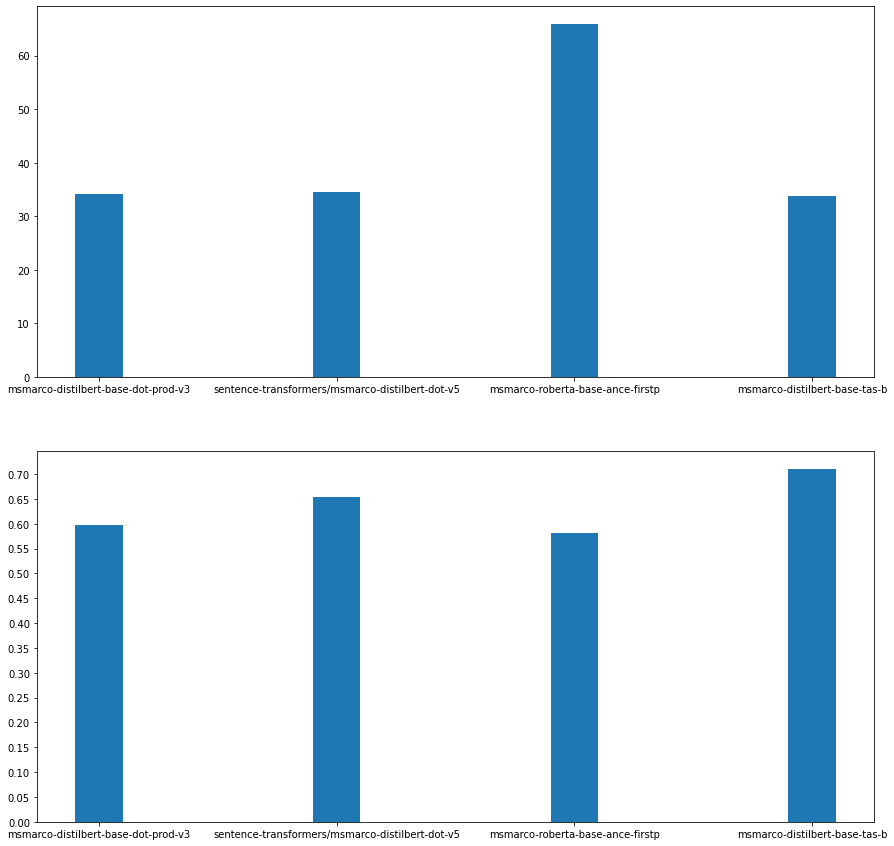

In [17]:
from benchmarking.plot_mrr import plot_mrr_dot, plot_mrr_cos
plot_mrr_dot(['msmarco-distilbert-base-dot-prod-v3', 'sentence-transformers/msmarco-distilbert-dot-v5', 'msmarco-roberta-base-ance-firstp', 'msmarco-distilbert-base-tas-b'])

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


Downloading:   0%|          | 0.00/736 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/627 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/430 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/545 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/319 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/678 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

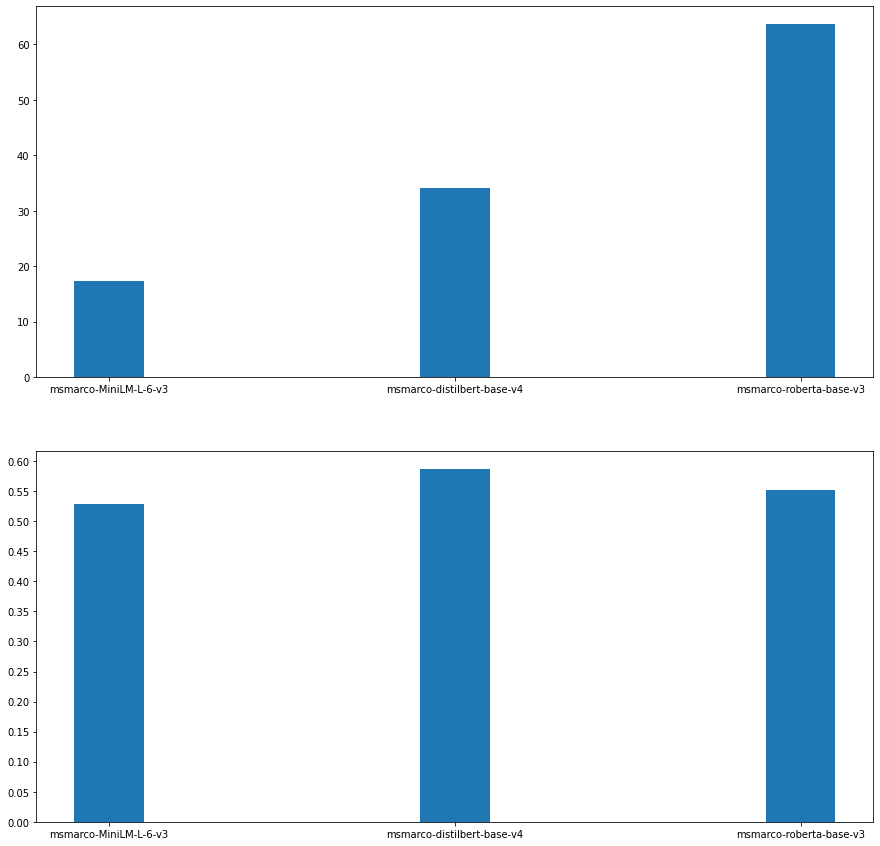

In [18]:
plot_mrr_cos(['msmarco-MiniLM-L-6-v3', 'msmarco-distilbert-base-v4', 'msmarco-roberta-base-v3'])

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Create Annoy index with 256 trees.
Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

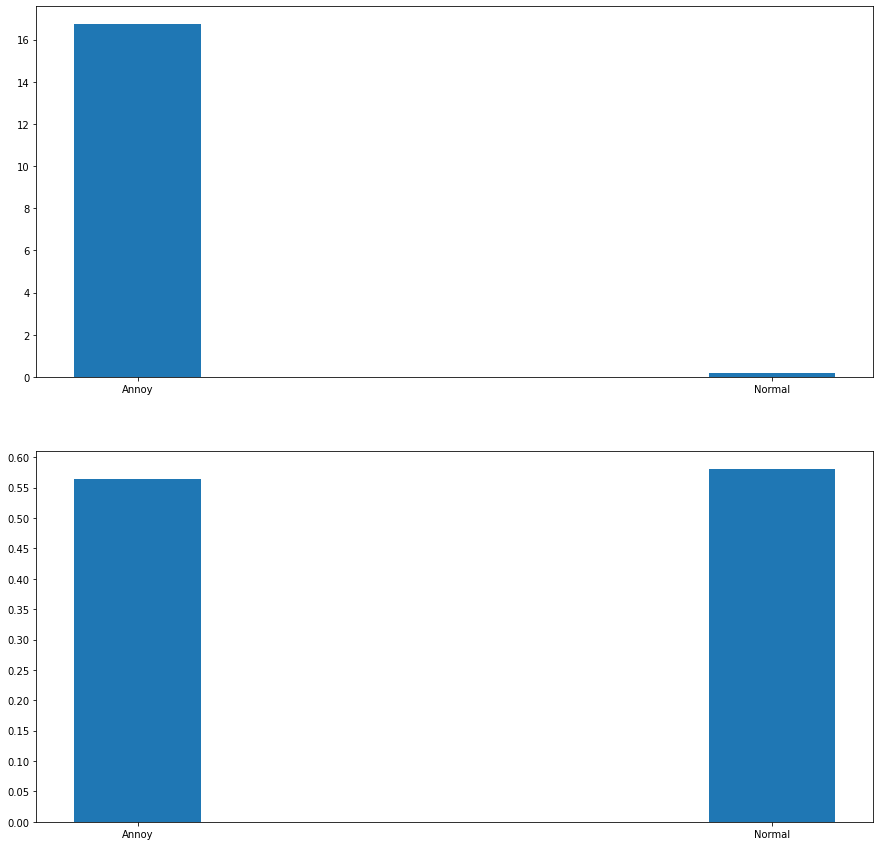

In [19]:
from benchmarking.plot_mrr import compare
compare('msmarco-roberta-base-ance-firstp', 10)

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding queries:


Batches:   0%|          | 0/372 [00:00<?, ?it/s]

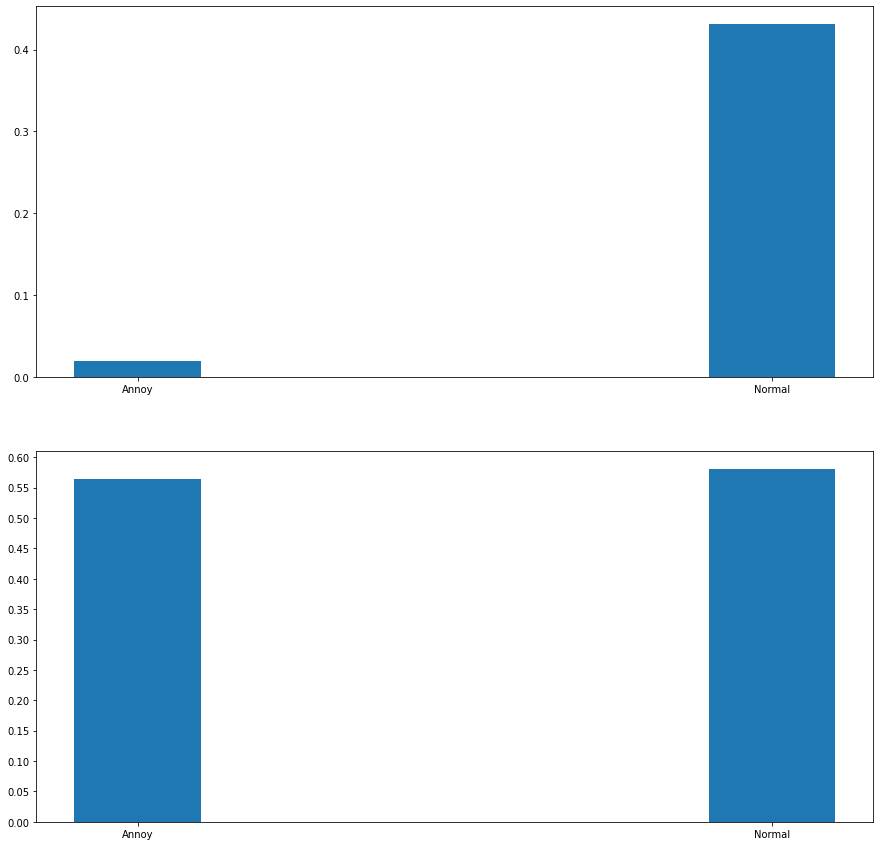

In [20]:
from benchmarking.plot_mrr import compare_cpu
compare_cpu('msmarco-roberta-base-ance-firstp', 10)